## Tensorflow Basic2 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
tf.set_random_seed(777)
np.random.seed(777)

In [4]:
w=tf.Variable(tf.random_normal([1]),name="weight")
b=tf.Variable(tf.random_normal([1]),name="bias")

In [6]:
x=tf.placeholder(tf.float32, shape=[None]) #shape=None: 갯수가 정해지지 않음.
y=tf.placeholder(tf.float32, shape=[None])

In [7]:
hf=x*w+b
cost=tf.reduce_mean(tf.square(hf-y)) #reduce_mean: 합+평균

In [12]:
opt=tf.train.GradientDescentOptimizer(0.01)
train=opt.minimize(cost)

In [13]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
for step in range(2001):
    _,cv,wv,bv=sess.run([train,cost,w,b], feed_dict={x:[1,2,3], y:[2,3,4]})
    if step % 100==0:
        print(step, cv, wv, bv)

0 1.1655599 [2.1328948] [-0.8424566]
100 0.34263894 [1.6782194] [-0.5417468]
200 0.21172994 [1.5331408] [-0.21195433]
300 0.13083634 [1.4190973] [0.04729332]
400 0.08084888 [1.3294486] [0.2510858]
500 0.04995973 [1.2589766] [0.41128525]
600 0.030872086 [1.2035793] [0.5372166]
700 0.019077042 [1.1600317] [0.63621026]
800 0.0117884725 [1.1257995] [0.714028]
900 0.007284535 [1.0988896] [0.7752003]
1000 0.0045013796 [1.0777364] [0.82328707]
1100 0.002781597 [1.0611081] [0.86108756]
1200 0.0017188614 [1.0480365] [0.89080197]
1300 0.0010621501 [1.037761] [0.9141603]
1400 0.0006563457 [1.0296836] [0.9325222]
1500 0.00040557692 [1.023334] [0.94695634]
1600 0.00025062592 [1.0183427] [0.9583026]
1700 0.0001548683 [1.0144188] [0.9672225]
1800 9.5698495e-05 [1.0113345] [0.9742339]
1900 5.9135855e-05 [1.00891] [0.9797457]
2000 3.6540103e-05 [1.0070039] [0.9840784]


In [19]:
print(sess.run(hf,feed_dict={x:[10]}))
print(sess.run(hf,feed_dict={x:[10,15,20]}))

[11.054117]
[11.054117 16.089138 21.124157]


In [20]:
#변수값 초기화
w=tf.Variable([100.], tf.float32)
b=tf.Variable([-10.], tf.float32)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

#hf = 100 * x -10

In [21]:
hf=x*w+b
cost=tf.reduce_sum(tf.square(hf-y))

In [22]:
opt=tf.train.GradientDescentOptimizer(0.01)
train=opt.minimize(cost)

In [23]:
xtrain=[1,2,3,4,5]
ytrain=[0,-1,-2,-3,-4]
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
for i in range(1001):
    sess.run(train, {x:xtrain, y: ytrain})    

In [26]:
wv,bv,cv=sess.run([w,b,cost], {x:xtrain, y: ytrain})
print("weight: %s, bias: %s, cost: %s" %(wv,bv,cv))

weight: [-0.9999995], bias: [0.99999833], cost: 2.5579538e-12


In [56]:
#연습
#weight 값을 -3 부터 5까지 0.1씩 증가시켜 가면서 cost값의 변화를 출력
x=[1,3,5]
y=[10,28,40]
w=tf.placeholder(tf.float32)

hf=x*w
loss=tf.reduce_sum(tf.square(hf-y))

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [57]:
w_list=[]
c_list=[]

for i in range(-30,50):
    weight_v=i*0.1
    loss_v=sess.run(loss, feed_dict={w:weight_v})
    w_list.append(weight_v)
    c_list.append(loss_v)

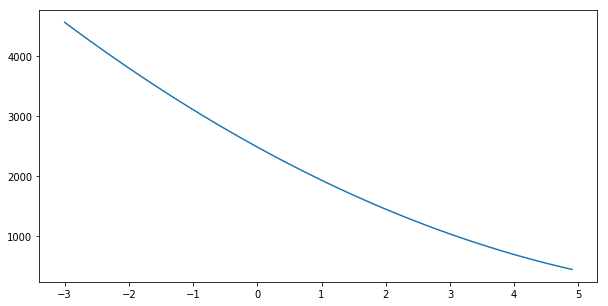

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(w_list,c_list)

In [74]:
w=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [78]:
xdata=[1,2,3,4,5]
ydata=[0,-1,-2,-3,-4]

In [79]:
lr=0.1
hf=x*w
cost=tf.reduce_mean(tf.square(hf-y))
gradient=tf.reduce_mean((w*x-y)*x)
descent=w-lr*gradient
update=w.assign(descent)

In [80]:
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update,feed_dict={x:xdata, y:ydata})
    print(step, sess.run(cost,feed_dict={x:xdata, y:ydata}), sess.run(w))

0 0.23360834 [-0.795889]
1 0.18233609 [-0.7204111]
2 0.18182336 [-0.7279589]
3 0.18181822 [-0.7272041]
4 0.18181817 [-0.7272796]
5 0.18181817 [-0.72727203]
6 0.1818182 [-0.7272728]
7 0.18181817 [-0.72727275]
8 0.18181817 [-0.72727275]
9 0.18181817 [-0.72727275]
10 0.18181817 [-0.72727275]
11 0.18181817 [-0.72727275]
12 0.18181817 [-0.72727275]
13 0.18181817 [-0.72727275]
14 0.18181817 [-0.72727275]
15 0.18181817 [-0.72727275]
16 0.18181817 [-0.72727275]
17 0.18181817 [-0.72727275]
18 0.18181817 [-0.72727275]
19 0.18181817 [-0.72727275]
20 0.18181817 [-0.72727275]


## Multi variable linear regression 

In [130]:
xdata=[[73,93,90,95,72],[80,88,92,98,66],[75,92,90,100,70]] #5명의 1차 모의고사 수학점수  #2차 모의고사 점수 #3차 모의고사 점수
ydata=[[152],[185],[180],[195],[140]]

In [131]:
xdata=np.array(xdata).T
xdata.shape

(5, 3)

In [100]:
np.shape(ydata)

(5, 1)

In [102]:
x=tf.placeholder(tf.float32, shape=[None,3])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

In [106]:
hf=tf.matmul(x,w)+b #(5,3)*(3*1)+1
cost=tf.reduce_mean(tf.square(hf-y))

In [107]:
opt=tf.train.GradientDescentOptimizer(1e-5)
train=opt.minimize(cost)

In [108]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [109]:
for step in range(2001):
    cv,hfv,_=sess.run([cost,hf,train], feed_dict={x:xdata, y:ydata})
    if step % 10 ==0:
        print(step, "cost:",cv,"prediction:",hfv)

0 cost: 55917.164 prediction: [[-56.78585 ]
 [-69.219666]
 [-68.138855]
 [-74.51569 ]
 [-52.756413]]
10 cost: 3.7907174 prediction: [[152.54716]
 [181.43335]
 [181.5881 ]
 [194.51894]
 [138.21683]]
20 cost: 3.2566376 prediction: [[153.18246]
 [182.20416]
 [182.35065]
 [195.34084]
 [138.80562]]
30 cost: 3.2460532 prediction: [[153.17921]
 [182.21039]
 [182.35141]
 [195.34207]
 [138.81187]]
40 cost: 3.2354865 prediction: [[153.17403]
 [182.21428]
 [182.34982]
 [195.3408 ]
 [138.81635]]
50 cost: 3.2250123 prediction: [[153.16885]
 [182.21815]
 [182.34827]
 [195.33952]
 [138.82079]]
60 cost: 3.2145684 prediction: [[153.16368]
 [182.22202]
 [182.3467 ]
 [195.33826]
 [138.82523]]
70 cost: 3.2041817 prediction: [[153.15852]
 [182.22586]
 [182.34512]
 [195.33699]
 [138.82965]]
80 cost: 3.193826 prediction: [[153.15338]
 [182.22972]
 [182.34357]
 [195.33572]
 [138.83408]]
90 cost: 3.1835694 prediction: [[153.14825]
 [182.23354]
 [182.34201]
 [195.33447]
 [138.83847]]
100 cost: 3.1733224 predict

1020 cost: 2.4209743 prediction: [[152.7228 ]
 [182.55067]
 [182.21217]
 [195.23204]
 [139.2027 ]]
1030 cost: 2.4145563 prediction: [[152.71873]
 [182.5537 ]
 [182.21094]
 [195.23108]
 [139.20618]]
1040 cost: 2.40814 prediction: [[152.71468]
 [182.55672]
 [182.20967]
 [195.23015]
 [139.20963]]
1050 cost: 2.4018173 prediction: [[152.71065]
 [182.55971]
 [182.20845]
 [195.2292 ]
 [139.21307]]
1060 cost: 2.3954654 prediction: [[152.70662]
 [182.56273]
 [182.20721]
 [195.22824]
 [139.21652]]
1070 cost: 2.389188 prediction: [[152.70259]
 [182.56569]
 [182.20596]
 [195.22731]
 [139.21994]]
1080 cost: 2.3829129 prediction: [[152.69858]
 [182.56868]
 [182.20473]
 [195.22636]
 [139.22336]]
1090 cost: 2.3766723 prediction: [[152.69458]
 [182.57166]
 [182.20349]
 [195.22542]
 [139.22678]]
1100 cost: 2.3704624 prediction: [[152.69058]
 [182.57463]
 [182.20227]
 [195.22449]
 [139.2302 ]]
1110 cost: 2.3642945 prediction: [[152.6866 ]
 [182.57759]
 [182.20105]
 [195.22354]
 [139.23358]]
1120 cost: 2.

In [ ]:
x1data=[73,93,90,95,72]
x2data=[80,88,92,98,66]
x3data=[75,92,90,100,70] #5명의 1차 모의고사 수학점수  #2차 모의고사 점수 #3차 모의고사 점수
ydata=[152,185,180,195,140]

In [87]:
x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)

w1=tf.Variable(tf.random_normal([1]))
w2=tf.Variable(tf.random_normal([1]))
w3=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=x1*w1+x2*w2+x3*w3+b
cost=tf.reduce_mean(tf.square(hf-y))

In [88]:
opt=tf.train.GradientDescentOptimizer(1e-5)
train=opt.minimize(cost)

In [89]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [90]:
for step in range(2001):
    cv,hfv,_=sess.run([cost, hf, train], feed_dict={x1:x1data, x2: x2data, x3:x3data, y:ydata})
    
    if step % 10 ==0:
        print(step , "cost:",cv,"prediction:",hfv)

0 cost: 103308.336 prediction: [-131.04372  -160.3757   -157.55017  -171.21124  -122.855095]
10 cost: 7.7369576 prediction: [153.4871  180.32089 181.88635 194.46883 136.72299]
20 cost: 6.742148 prediction: [154.34932 181.36961 182.92244 195.58554 137.52448]
30 cost: 6.7145224 prediction: [154.3436  181.3791  182.92313 195.5868  137.53418]
40 cost: 6.6870413 prediction: [154.33524 181.3854  182.92062 195.58466 137.5414 ]
50 cost: 6.6597633 prediction: [154.3269  181.39165 182.91814 195.5825  137.54861]
60 cost: 6.6325617 prediction: [154.31859 181.3979  182.91563 195.58037 137.5558 ]
70 cost: 6.6055083 prediction: [154.31027 181.40413 182.91316 195.57823 137.56299]
80 cost: 6.578608 prediction: [154.30202 181.41035 182.91069 195.5761  137.57014]
90 cost: 6.551834 prediction: [154.29375 181.41655 182.90822 195.57396 137.57727]
100 cost: 6.525224 prediction: [154.2855  181.42273 182.90578 195.57187 137.5844 ]
110 cost: 6.4986815 prediction: [154.2773  181.42891 182.9033  195.56975 137.591

1250 cost: 4.203875 prediction: [153.463   182.03906 182.65852 195.36372 138.2936 ]
1260 cost: 4.189006 prediction: [153.45682 182.04366 182.65665 195.3622  138.29889]
1270 cost: 4.1741896 prediction: [153.45067 182.04828 182.6548  195.36069 138.30418]
1280 cost: 4.159466 prediction: [153.44453 182.05284 182.65292 195.35915 138.30946]
1290 cost: 4.1447825 prediction: [153.43842 182.05745 182.65108 195.35765 138.31473]
1300 cost: 4.1302032 prediction: [153.43231 182.062   182.64922 195.35611 138.31998]
1310 cost: 4.115695 prediction: [153.42621 182.06656 182.64738 195.35463 138.32521]
1320 cost: 4.1012726 prediction: [153.42012 182.07109 182.64555 195.35312 138.33043]
1330 cost: 4.0868707 prediction: [153.41406 182.07564 182.6437  195.35161 138.33565]
1340 cost: 4.0725784 prediction: [153.40802 182.08015 182.64188 195.35013 138.34085]
1350 cost: 4.0583677 prediction: [153.402   182.08467 182.64006 195.34865 138.34602]
1360 cost: 4.0442114 prediction: [153.39598 182.08917 182.63824 195.3

In [176]:
#연습

In [154]:
testscore=pd.read_csv("testscore.csv", header=None)

In [155]:
testscore.columns=['first','second','third','target']

In [156]:
testscore

,first,second,third,target
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [157]:
xdata=testscore.iloc[:,:3]
xdata.shape

(25, 3)

In [158]:
# xdata=xdata.T

In [159]:
ydata=testscore.iloc[:,-1:]
ydata.shape

(25, 1)

In [160]:
x=tf.placeholder(tf.float32, shape=[None,3])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

In [161]:
hf=tf.matmul(x,w)+b #(5,3)*(3*1)+1
cost=tf.reduce_mean(tf.square(hf-y))

In [162]:
opt=tf.train.GradientDescentOptimizer(1e-5)
train=opt.minimize(cost)

In [174]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    cv,hfv,_=sess.run([cost,hf,train], feed_dict={x:xdata, y:ydata})
    if step % 10 ==0:
        print(step, "cost(loss):",cv,"prediction:",hfv)     

0 cost(loss): 10876.245 prediction: [[48.558563]
 [73.9685  ]
 [64.88647 ]
 [70.68875 ]
 [60.167717]
 [46.005165]
 [48.40151 ]
 [29.16256 ]
 [72.66506 ]
 [68.60473 ]
 [51.260754]
 [57.370106]
 [67.36303 ]
 [57.007217]
 [50.939705]
 [73.609634]
 [59.113846]
 [54.573727]
 [61.81436 ]
 [53.57333 ]
 [59.078373]
 [68.341286]
 [54.997135]
 [49.57061 ]
 [74.26281 ]]
10 cost(loss): 52.19086 prediction: [[145.7245  ]
 [190.71263 ]
 [179.937   ]
 [195.98964 ]
 [149.19235 ]
 [111.637985]
 [142.20815 ]
 [ 98.72658 ]
 [181.76402 ]
 [169.65807 ]
 [141.62436 ]
 [146.45354 ]
 [186.22319 ]
 [155.80898 ]
 [145.17174 ]
 [192.08328 ]
 [153.1944  ]
 [167.16154 ]
 [175.13638 ]
 [154.97429 ]
 [169.07497 ]
 [177.86765 ]
 [159.87303 ]
 [147.53053 ]
 [195.2599  ]]
20 cost(loss): 51.441055 prediction: [[146.41426 ]
 [191.50127 ]
 [180.73466 ]
 [196.86061 ]
 [149.7819  ]
 [112.0714  ]
 [142.87477 ]
 [ 99.242516]
 [182.49443 ]
 [170.33595 ]
 [142.25227 ]
 [147.05571 ]
 [187.04424 ]
 [156.48552 ]
 [145.83565 ]
 [19

300 cost(loss): 45.380978 prediction: [[146.91615 ]
 [191.01968 ]
 [180.81403 ]
 [197.00961 ]
 [149.09337 ]
 [111.53382 ]
 [143.38414 ]
 [100.208336]
 [181.86935 ]
 [169.79855 ]
 [142.35521 ]
 [146.70262 ]
 [187.04182 ]
 [156.31961 ]
 [146.19226 ]
 [192.561   ]
 [153.25218 ]
 [168.87492 ]
 [176.07974 ]
 [155.95207 ]
 [170.26932 ]
 [178.29158 ]
 [161.08847 ]
 [148.53726 ]
 [195.72346 ]]
310 cost(loss): 45.180424 prediction: [[146.93315]
 [191.00296]
 [180.81651]
 [197.01454]
 [149.06956]
 [111.51537]
 [143.40155]
 [100.24155]
 [181.84782]
 [169.78023]
 [142.35864]
 [146.69048]
 [187.04144]
 [156.31355]
 [146.20447]
 [192.5496 ]
 [153.23218]
 [168.90585]
 [176.08475]
 [155.96097]
 [170.28363]
 [178.28046]
 [161.10464]
 [148.54779]
 [195.71088]]
320 cost(loss): 44.98089 prediction: [[146.95007 ]
 [190.98627 ]
 [180.81897 ]
 [197.01944 ]
 [149.0458  ]
 [111.496956]
 [143.41893 ]
 [100.27468 ]
 [181.82637 ]
 [169.76193 ]
 [142.36206 ]
 [146.67834 ]
 [187.04102 ]
 [156.30748 ]
 [146.21663 ]


560 cost(loss): 40.490402 prediction: [[147.34155]
 [190.59933]
 [180.87523]
 [197.13354]
 [148.49397]
 [111.07166]
 [143.8238 ]
 [101.04678]
 [181.33052]
 [169.34299]
 [142.44212]
 [146.39926]
 [187.02896]
 [156.16306]
 [146.50116]
 [192.27548]
 [152.74393]
 [169.65497]
 [176.2018 ]
 [156.17264]
 [170.63069]
 [178.01328]
 [161.49554]
 [148.79636]
 [195.40645]]
570 cost(loss): 40.315174 prediction: [[147.35725]
 [190.58376]
 [180.87747]
 [197.13814]
 [148.47174]
 [111.05461]
 [143.84018]
 [101.07801]
 [181.31064]
 [169.32632]
 [142.44539]
 [146.38812]
 [187.02838]
 [156.15707]
 [146.5127 ]
 [192.26495]
 [152.72488]
 [169.68399]
 [176.20619]
 [156.1807 ]
 [170.64417]
 [178.00302]
 [161.51068]
 [148.80576]
 [195.39465]]
580 cost(loss): 40.140804 prediction: [[147.37291 ]
 [190.56819 ]
 [180.87967 ]
 [197.14273 ]
 [148.44954 ]
 [111.037605]
 [143.8565  ]
 [101.10915 ]
 [181.29082 ]
 [169.30972 ]
 [142.44862 ]
 [146.377   ]
 [187.02779 ]
 [156.15111 ]
 [146.52422 ]
 [192.25444 ]
 [152.7058

880 cost(loss): 35.30765 prediction: [[147.82138 ]
 [190.121   ]
 [180.94196 ]
 [197.27519 ]
 [147.81001 ]
 [110.550835]
 [144.32886 ]
 [102.01019 ]
 [180.72322 ]
 [168.83896 ]
 [142.54318 ]
 [146.0599  ]
 [187.00746 ]
 [155.97406 ]
 [146.8586  ]
 [191.95375 ]
 [152.15215 ]
 [170.54953 ]
 [176.33273 ]
 [156.41664 ]
 [171.04684 ]
 [177.7     ]
 [161.96194 ]
 [149.078   ]
 [195.04309 ]]
890 cost(loss): 35.159096 prediction: [[147.83566 ]
 [190.10672 ]
 [180.9439  ]
 [197.27942 ]
 [147.78955 ]
 [110.535355]
 [144.34402 ]
 [102.03913 ]
 [180.7052  ]
 [168.82414 ]
 [142.54625 ]
 [146.04987 ]
 [187.00671 ]
 [155.96823 ]
 [146.86938 ]
 [191.9442  ]
 [152.13425 ]
 [170.57637 ]
 [176.3365  ]
 [156.42381 ]
 [171.05937 ]
 [177.6907  ]
 [161.97594 ]
 [149.0862  ]
 [195.0322  ]]
900 cost(loss): 35.01128 prediction: [[147.84988]
 [190.09245]
 [180.94583]
 [197.28368]
 [147.76913]
 [110.51993]
 [144.35916]
 [102.068  ]
 [180.6872 ]
 [168.80937]
 [142.54929]
 [146.03986]
 [187.00594]
 [155.9624 ]
 [14

 [194.71739]]
1200 cost(loss): 30.912937 prediction: [[148.25745]
 [189.68225]
 [181.00032]
 [197.40575]
 [147.18077]
 [110.078  ]
 [144.79674]
 [102.90296]
 [180.17184]
 [168.3905 ]
 [142.63797]
 [145.75427]
 [186.98108]
 [155.79019]
 [147.19225]
 [191.66171]
 [151.5963 ]
 [171.37682]
 [176.44514]
 [156.63373]
 [171.43336]
 [177.41595]
 [162.39284]
 [149.32356]
 [194.70729]]
1210 cost(loss): 30.786928 prediction: [[148.2704 ]
 [189.66914]
 [181.002  ]
 [197.40965]
 [147.16194]
 [110.06396]
 [144.81078]
 [102.92978]
 [180.15544]
 [168.3773 ]
 [142.64082]
 [145.74522]
 [186.9802 ]
 [155.78453]
 [147.2023 ]
 [191.65303]
 [151.57951]
 [171.40164]
 [176.44838]
 [156.6401 ]
 [171.44498]
 [177.4075 ]
 [162.40576]
 [149.3307 ]
 [194.6972 ]]
1220 cost(loss): 30.661545 prediction: [[148.28334]
 [189.65605]
 [181.00371]
 [197.41356]
 [147.14314]
 [110.04995]
 [144.8248 ]
 [102.95653]
 [180.13911]
 [168.36417]
 [142.64369]
 [145.7362 ]
 [186.9793 ]
 [155.77888]
 [147.21233]
 [191.64436]
 [151.562

1510 cost(loss): 27.291803 prediction: [[148.64217]
 [189.2917 ]
 [181.0499 ]
 [197.52249]
 [146.61914]
 [109.66127]
 [145.21704]
 [103.70517]
 [179.6858 ]
 [168.00293]
 [142.72408]
 [145.48694]
 [186.95207]
 [155.61775]
 [147.49403]
 [191.40434]
 [151.09071]
 [172.11884]
 [176.53879]
 [156.82133]
 [171.78142]
 [177.16588]
 [162.77896]
 [149.53146]
 [194.4063 ]]
1520 cost(loss): 27.1843 prediction: [[148.654  ]
 [189.27963]
 [181.05138]
 [197.5261 ]
 [146.60176]
 [109.64845]
 [145.23009]
 [103.73007]
 [179.67085]
 [167.99112]
 [142.72676]
 [145.47874]
 [186.95107]
 [155.61227]
 [147.50343]
 [191.39644]
 [151.07494]
 [172.14183]
 [176.54158]
 [156.82704]
 [171.7922 ]
 [177.15819]
 [162.79092]
 [149.5377 ]
 [194.39696]]
1530 cost(loss): 27.07735 prediction: [[148.6658  ]
 [189.26761 ]
 [181.05287 ]
 [197.52971 ]
 [146.58443 ]
 [109.63567 ]
 [145.24309 ]
 [103.754906]
 [179.65596 ]
 [167.97935 ]
 [142.72945 ]
 [145.47058 ]
 [186.95009 ]
 [155.60683 ]
 [147.5128  ]
 [191.38855 ]
 [151.0591

1800 cost(loss): 24.38709 prediction: [[148.9716  ]
 [188.95456 ]
 [181.09084 ]
 [197.62366 ]
 [146.13309 ]
 [109.304726]
 [145.58286 ]
 [104.40359 ]
 [179.2699  ]
 [167.67741 ]
 [142.79976 ]
 [145.25983 ]
 [186.92265 ]
 [155.46199 ]
 [147.75833 ]
 [191.1842  ]
 [150.64575 ]
 [172.76376 ]
 [176.6146  ]
 [156.97888 ]
 [172.08496 ]
 [176.95215 ]
 [163.11429 ]
 [149.70256 ]
 [194.14478 ]]
1810 cost(loss): 24.294409 prediction: [[148.98247]
 [188.9434 ]
 [181.09216]
 [197.62703]
 [146.11699]
 [109.29298]
 [145.59503]
 [104.42683]
 [179.2562 ]
 [167.6668 ]
 [142.80229]
 [145.25237]
 [186.92162]
 [155.45674]
 [147.76714]
 [191.17696]
 [150.63087]
 [172.7852 ]
 [176.61703]
 [156.98402]
 [172.09508]
 [176.94511]
 [163.12544]
 [149.7081 ]
 [194.13611]]
1820 cost(loss): 24.20222 prediction: [[148.9933 ]
 [188.93227]
 [181.09349]
 [197.63039]
 [146.1009 ]
 [109.28125]
 [145.60716]
 [104.44999]
 [179.24252]
 [167.6562 ]
 [142.80482]
 [145.24493]
 [186.92056]
 [155.45148]
 [147.77592]
 [191.16971]


2090 cost(loss): 21.882326 prediction: [[149.27422]
 [188.64253]
 [181.12715]
 [197.71765]
 [145.6822 ]
 [108.97748]
 [145.92403]
 [105.05505]
 [178.88814]
 [167.3839 ]
 [142.87099]
 [145.05278]
 [186.89174]
 [155.31198]
 [148.00615]
 [190.98216]
 [150.22667]
 [173.36443]
 [176.68048]
 [157.12093]
 [172.36859]
 [176.75618]
 [163.42638]
 [149.8538 ]
 [193.90135]]
2100 cost(loss): 21.802368 prediction: [[149.28421]
 [188.63219]
 [181.12831]
 [197.72076]
 [145.66725]
 [108.96667]
 [145.93536]
 [105.07671]
 [178.87553]
 [167.3743 ]
 [142.87335]
 [145.04597]
 [186.89064]
 [155.30692]
 [148.0144 ]
 [190.97548]
 [150.21265]
 [173.38438]
 [176.68259]
 [157.12556]
 [172.37804]
 [176.74971]
 [163.43674]
 [149.85869]
 [193.89326]]
2110 cost(loss): 21.722857 prediction: [[149.29416 ]
 [188.62189 ]
 [181.12949 ]
 [197.72388 ]
 [145.65233 ]
 [108.955925]
 [145.94669 ]
 [105.098335]
 [178.86299 ]
 [167.36475 ]
 [142.87572 ]
 [145.03918 ]
 [186.88954 ]
 [155.30185 ]
 [148.02264 ]
 [190.96884 ]
 [150.1

2400 cost(loss): 19.584063 prediction: [[149.5707  ]
 [188.33453 ]
 [181.16144 ]
 [197.81078 ]
 [145.23615 ]
 [108.657135]
 [146.26324 ]
 [105.70297 ]
 [178.5144  ]
 [167.10172 ]
 [142.9424  ]
 [144.85149 ]
 [186.8576  ]
 [155.15822 ]
 [148.25388 ]
 [190.7844  ]
 [149.80597 ]
 [173.961   ]
 [176.74133 ]
 [157.25749 ]
 [172.65115 ]
 [176.56454 ]
 [163.73608 ]
 [149.99615 ]
 [193.6597  ]]
2410 cost(loss): 19.51579 prediction: [[149.57983]
 [188.32503]
 [181.16249]
 [197.81366]
 [145.22235]
 [108.64728]
 [146.27377]
 [105.72308]
 [178.50291]
 [167.09312]
 [142.94464]
 [144.8453 ]
 [186.8565 ]
 [155.15338]
 [148.2616 ]
 [190.77832]
 [149.79285]
 [173.97949]
 [176.74316]
 [157.26166]
 [172.65994]
 [176.55865]
 [163.7457 ]
 [150.00044]
 [193.65222]]
2420 cost(loss): 19.447878 prediction: [[149.58893 ]
 [188.31552 ]
 [181.16351 ]
 [197.81653 ]
 [145.20859 ]
 [108.63744 ]
 [146.28429 ]
 [105.743126]
 [178.49146 ]
 [167.08455 ]
 [142.94685 ]
 [144.83916 ]
 [186.85538 ]
 [155.14853 ]
 [148.26929

2730 cost(loss): 17.50469 prediction: [[149.85844 ]
 [188.03333 ]
 [181.19347 ]
 [197.90218 ]
 [144.79892 ]
 [108.34649 ]
 [146.59747 ]
 [106.341484]
 [178.15195 ]
 [166.8332  ]
 [143.01335 ]
 [144.65764 ]
 [186.82066 ]
 [155.00217 ]
 [148.49925 ]
 [190.59267 ]
 [149.38753 ]
 [174.548   ]
 [176.79674 ]
 [157.3874  ]
 [172.93004 ]
 [176.37892 ]
 [164.04063 ]
 [150.12848 ]
 [193.42204 ]]
2740 cost(loss): 17.446953 prediction: [[149.86674]
 [188.02461]
 [181.19438]
 [197.90483]
 [144.78624]
 [108.33753]
 [146.6072 ]
 [106.36005]
 [178.1415 ]
 [166.82555]
 [143.01544]
 [144.65208]
 [186.81953]
 [154.99759]
 [148.50642]
 [190.58714]
 [149.3753 ]
 [174.56508]
 [176.79828]
 [157.39113]
 [172.93817]
 [176.37358]
 [164.04948]
 [150.13222]
 [193.41513]]
2750 cost(loss): 17.389519 prediction: [[149.87502 ]
 [188.01591 ]
 [181.19527 ]
 [197.90749 ]
 [144.7736  ]
 [108.32859 ]
 [146.61688 ]
 [106.378555]
 [178.13107 ]
 [166.81792 ]
 [143.0175  ]
 [144.64651 ]
 [186.8184  ]
 [154.99297 ]
 [148.51355

3050 cost(loss): 15.795043 prediction: [[150.11263]
 [187.76529]
 [181.22067]
 [197.9838 ]
 [144.40898]
 [108.0723 ]
 [146.89702]
 [106.91383]
 [177.83203]
 [166.60068]
 [143.07747]
 [144.48775]
 [186.7847 ]
 [154.85846]
 [148.72028]
 [190.42346]
 [149.00917]
 [175.07349]
 [176.84247]
 [157.49992]
 [173.18045]
 [176.21526]
 [164.31308]
 [150.24034]
 [193.20937]]
3060 cost(loss): 15.745941 prediction: [[150.1202 ]
 [187.75728]
 [181.22145]
 [197.98625]
 [144.39731]
 [108.06415]
 [146.90602]
 [106.93103]
 [177.8225 ]
 [166.59383]
 [143.07939]
 [144.48271]
 [186.78358]
 [154.8541 ]
 [148.72693]
 [190.41844]
 [148.99776]
 [175.08928]
 [176.8438 ]
 [157.50325]
 [173.18797]
 [176.21039]
 [164.32124]
 [150.2436 ]
 [193.20299]]
3070 cost(loss): 15.697138 prediction: [[150.12776 ]
 [187.74928 ]
 [181.22226 ]
 [197.9887  ]
 [144.38567 ]
 [108.056015]
 [146.915   ]
 [106.948166]
 [177.813   ]
 [166.58699 ]
 [143.08133 ]
 [144.47768 ]
 [186.78249 ]
 [154.84975 ]
 [148.73357 ]
 [190.4134  ]
 [148.9

3370 cost(loss): 14.3412695 prediction: [[150.34462]
 [187.51892]
 [181.24454]
 [198.0591 ]
 [144.04984]
 [107.82224]
 [147.17418]
 [107.4435 ]
 [177.5402 ]
 [166.39244]
 [143.13722]
 [144.33382]
 [186.74904]
 [154.72223]
 [148.9257 ]
 [190.26917]
 [148.65627]
 [175.55919]
 [176.88148]
 [157.60068]
 [173.41249]
 [176.06613]
 [164.56471]
 [150.33812]
 [193.0129 ]]
3380 cost(loss): 14.299513 prediction: [[150.35155]
 [187.51155]
 [181.24524]
 [198.06134]
 [144.03908]
 [107.81479]
 [147.1825 ]
 [107.4594 ]
 [177.53151]
 [166.3863 ]
 [143.139  ]
 [144.32925]
 [186.74796]
 [154.71808]
 [148.93188]
 [190.26457]
 [148.64563]
 [175.57376]
 [176.8826 ]
 [157.60365]
 [173.41946]
 [176.06168]
 [164.57227]
 [150.34096]
 [193.007  ]]
3390 cost(loss): 14.257992 prediction: [[150.35844]
 [187.5042 ]
 [181.24594]
 [198.0636 ]
 [144.02835]
 [107.80735]
 [147.19077]
 [107.47526]
 [177.52283]
 [166.38019]
 [143.14081]
 [144.32468]
 [186.74683]
 [154.71396]
 [148.93805]
 [190.25998]
 [148.63501]
 [175.588

3680 cost(loss): 13.140429 prediction: [[150.55019]
 [187.29921]
 [181.26491]
 [198.12645]
 [143.72893]
 [107.60084]
 [147.42284]
 [107.91883]
 [177.28181]
 [166.21132]
 [143.19118]
 [144.19841]
 [186.71507]
 [154.59724]
 [149.11081]
 [190.13258]
 [148.33725]
 [175.99455]
 [176.91376]
 [157.68831]
 [173.62102]
 [175.93423]
 [164.79015]
 [150.4211 ]
 [192.83687]]
3690 cost(loss): 13.104741 prediction: [[150.55652 ]
 [187.29242 ]
 [181.26552 ]
 [198.12854 ]
 [143.719   ]
 [107.594025]
 [147.43056 ]
 [107.93358 ]
 [177.27386 ]
 [166.20578 ]
 [143.19286 ]
 [144.19423 ]
 [186.71397 ]
 [154.59332 ]
 [149.11655 ]
 [190.12837 ]
 [148.32732 ]
 [176.00804 ]
 [176.9147  ]
 [157.69098 ]
 [173.6275  ]
 [175.93018 ]
 [164.79712 ]
 [150.42358 ]
 [192.8314  ]]
3700 cost(loss): 13.069206 prediction: [[150.56284]
 [187.28564]
 [181.26613]
 [198.13062]
 [143.70908]
 [107.58721]
 [147.43826]
 [107.94829]
 [177.26593]
 [166.20029]
 [143.19452]
 [144.1901 ]
 [186.71289]
 [154.58942]
 [149.1223 ]
 [190.12418

3970 cost(loss): 12.175131 prediction: [[150.72688]
 [187.1092 ]
 [181.28178]
 [198.18486]
 [143.45093]
 [107.41064]
 [147.63907]
 [108.33221]
 [177.05984]
 [166.05826]
 [143.23839]
 [144.08275]
 [186.68394]
 [154.48647]
 [149.27235]
 [190.01527]
 [148.05803]
 [176.37276]
 [176.93968]
 [157.76234]
 [173.80258]
 [175.82103]
 [164.98589]
 [150.48955]
 [192.68398]]
3980 cost(loss): 12.144319 prediction: [[150.73273]
 [187.10292]
 [181.28233]
 [198.1868 ]
 [143.44171]
 [107.40436]
 [147.64626]
 [108.34595]
 [177.05252]
 [166.05324]
 [143.23996]
 [144.07892]
 [186.68289]
 [154.48276]
 [149.27774]
 [190.0114 ]
 [148.0487 ]
 [176.38531]
 [176.94049]
 [157.76477]
 [173.80862]
 [175.81728]
 [164.99237]
 [150.49176]
 [192.67892]]
3990 cost(loss): 12.113621 prediction: [[150.73856 ]
 [187.09665 ]
 [181.28287 ]
 [198.18872 ]
 [143.43251 ]
 [107.398094]
 [147.65343 ]
 [108.35966 ]
 [177.0452  ]
 [166.04825 ]
 [143.24152 ]
 [144.07513 ]
 [186.68182 ]
 [154.47903 ]
 [149.2831  ]
 [190.00754 ]
 [148.0

4280 cost(loss): 11.288133 prediction: [[150.90056 ]
 [186.92143 ]
 [181.29778 ]
 [198.24274 ]
 [143.17572 ]
 [107.22385 ]
 [147.8539  ]
 [108.742966]
 [176.84181 ]
 [165.91034 ]
 [143.28554 ]
 [143.96979 ]
 [186.65163 ]
 [154.37444 ]
 [149.43343 ]
 [189.90007 ]
 [147.7789  ]
 [176.74821 ]
 [176.96344 ]
 [157.83391 ]
 [173.98318 ]
 [175.70993 ]
 [165.18007 ]
 [150.55412 ]
 [192.53227 ]]
4290 cost(loss): 11.261745 prediction: [[150.9059 ]
 [186.91562]
 [181.29825]
 [198.24454]
 [143.1672 ]
 [107.21808]
 [147.86055]
 [108.75569]
 [176.83508]
 [165.9058 ]
 [143.28699]
 [143.96631]
 [186.65057]
 [154.37091]
 [149.43842]
 [189.89651]
 [147.77022]
 [176.75984]
 [176.96414]
 [157.83609]
 [173.9888 ]
 [175.7065 ]
 [165.1861 ]
 [150.55608]
 [192.52757]]
4300 cost(loss): 11.235517 prediction: [[150.91125 ]
 [186.90982 ]
 [181.29874 ]
 [198.2463  ]
 [143.15872 ]
 [107.21233 ]
 [147.86722 ]
 [108.768394]
 [176.8284  ]
 [165.9013  ]
 [143.28847 ]
 [143.96284 ]
 [186.64957 ]
 [154.36743 ]
 [149.4434

4590 cost(loss): 10.529397 prediction: [[151.05983 ]
 [186.74823 ]
 [181.31192 ]
 [198.29626 ]
 [142.92148 ]
 [107.0526  ]
 [148.05304 ]
 [109.123795]
 [176.64195 ]
 [165.77692 ]
 [143.32947 ]
 [143.86682 ]
 [186.62033 ]
 [154.2688  ]
 [149.58325 ]
 [189.79448 ]
 [147.5186  ]
 [177.09598 ]
 [176.98367 ]
 [157.89844 ]
 [174.15082 ]
 [175.60818 ]
 [165.3599  ]
 [150.6109  ]
 [192.39182 ]]
4600 cost(loss): 10.5068245 prediction: [[151.06474]
 [186.74284]
 [181.31233]
 [198.29793]
 [142.91359]
 [107.04732]
 [148.05922]
 [109.1356 ]
 [176.63577]
 [165.77283]
 [143.33083]
 [143.86365]
 [186.61934]
 [154.26549]
 [149.58788]
 [189.79121]
 [147.51051]
 [177.10677]
 [176.98427]
 [157.9004 ]
 [174.15602]
 [175.60503]
 [165.36546]
 [150.61261]
 [192.38744]]
4610 cost(loss): 10.484393 prediction: [[151.06964 ]
 [186.73752 ]
 [181.31277 ]
 [198.29958 ]
 [142.90575 ]
 [107.04205 ]
 [148.06538 ]
 [109.147385]
 [176.62964 ]
 [165.76877 ]
 [143.3322  ]
 [143.8605  ]
 [186.61835 ]
 [154.26219 ]
 [149.592

4890 cost(loss): 9.899702 prediction: [[151.20146]
 [186.59338]
 [181.32405]
 [198.34422]
 [142.69383]
 [106.9004 ]
 [148.2319 ]
 [109.46586]
 [176.46431]
 [165.66017]
 [143.36913]
 [143.7758 ]
 [186.59114]
 [154.17244]
 [149.71822]
 [189.70064]
 [147.28355]
 [177.4081 ]
 [177.00038]
 [157.95488]
 [174.30153]
 [175.51782]
 [165.5212 ]
 [150.65932]
 [192.26576]]
4900 cost(loss): 9.880304 prediction: [[151.206  ]
 [186.58842]
 [181.32443]
 [198.34576]
 [142.68654]
 [106.89554]
 [148.23764]
 [109.47684]
 [176.45865]
 [165.65648]
 [143.37039]
 [143.77292]
 [186.59021]
 [154.16931]
 [149.72255]
 [189.69766]
 [147.27597]
 [177.41812]
 [177.00089]
 [157.95667]
 [174.30638]
 [175.51494]
 [165.52635]
 [150.66083]
 [192.26172]]
4910 cost(loss): 9.861015 prediction: [[151.21051 ]
 [186.5835  ]
 [181.32481 ]
 [198.34732 ]
 [142.67929 ]
 [106.8907  ]
 [148.24338 ]
 [109.487785]
 [176.45299 ]
 [165.6528  ]
 [143.37167 ]
 [143.77002 ]
 [186.58926 ]
 [154.16623 ]
 [149.72688 ]
 [189.69467 ]
 [147.2684

5190 cost(loss): 9.358232 prediction: [[151.33186]
 [186.45015]
 [181.33482]
 [198.38872]
 [142.48296]
 [106.76037]
 [148.39809]
 [109.78372]
 [176.30089]
 [165.55437]
 [143.40614]
 [143.69249]
 [186.56313]
 [154.08165]
 [149.84398]
 [189.61435]
 [147.06404]
 [177.6979 ]
 [177.0146 ]
 [158.00606]
 [174.44173]
 [175.43477]
 [165.67088]
 [150.7021 ]
 [192.14879]]
5200 cost(loss): 9.341541 prediction: [[151.33603 ]
 [186.44556 ]
 [181.33514 ]
 [198.39014 ]
 [142.4762  ]
 [106.755905]
 [148.40341 ]
 [109.79393 ]
 [176.29565 ]
 [165.55103 ]
 [143.40732 ]
 [143.68983 ]
 [186.56221 ]
 [154.0787  ]
 [149.84802 ]
 [189.6116  ]
 [147.05699 ]
 [177.70718 ]
 [177.01505 ]
 [158.00768 ]
 [174.44623 ]
 [175.43211 ]
 [165.67569 ]
 [150.70343 ]
 [192.14502 ]]
5210 cost(loss): 9.324959 prediction: [[151.34018]
 [186.441  ]
 [181.33551]
 [198.39157]
 [142.46948]
 [106.75145]
 [148.40875]
 [109.8041 ]
 [176.29047]
 [165.54768]
 [143.40852]
 [143.6872 ]
 [186.56131]
 [154.07579]
 [149.85205]
 [189.60884]
 

5480 cost(loss): 8.906977 prediction: [[151.44807 ]
 [186.32188 ]
 [181.3441  ]
 [198.42863 ]
 [142.29387 ]
 [106.63561 ]
 [148.54753 ]
 [110.069565]
 [176.15526 ]
 [165.46146 ]
 [143.43956 ]
 [143.61864 ]
 [186.53716 ]
 [153.99898 ]
 [149.95737 ]
 [189.53748 ]
 [146.86577 ]
 [177.95833 ]
 [177.02637 ]
 [158.051   ]
 [174.5679  ]
 [175.36082 ]
 [165.80536 ]
 [150.73872 ]
 [192.04369 ]]
5490 cost(loss): 8.892569 prediction: [[151.45193 ]
 [186.31763 ]
 [181.34439 ]
 [198.42996 ]
 [142.2876  ]
 [106.631485]
 [148.55247 ]
 [110.07906 ]
 [176.15045 ]
 [165.4584  ]
 [143.44066 ]
 [143.61618 ]
 [186.53629 ]
 [153.9962  ]
 [149.96114 ]
 [189.53491 ]
 [146.85916 ]
 [177.96696 ]
 [177.02673 ]
 [158.05246 ]
 [174.5721  ]
 [175.35837 ]
 [165.80981 ]
 [150.73991 ]
 [192.04019 ]]
5500 cost(loss): 8.878227 prediction: [[151.45575]
 [186.31337]
 [181.3447 ]
 [198.43129]
 [142.28133]
 [106.62737]
 [148.55742]
 [110.08854]
 [176.14565]
 [165.45535]
 [143.44177]
 [143.61375]
 [186.53542]
 [153.99344]
 [

5780 cost(loss): 8.5044365 prediction: [[151.559  ]
 [186.19894]
 [181.35265]
 [198.467  ]
 [142.11241]
 [106.5166 ]
 [148.6913 ]
 [110.34462]
 [176.01637]
 [165.37404]
 [143.47182]
 [143.54848]
 [186.51147]
 [153.91844]
 [150.06673]
 [189.46414]
 [146.67415]
 [178.20876]
 [177.0367 ]
 [158.09325]
 [174.6894 ]
 [175.29031]
 [165.93462]
 [150.7723 ]
 [191.94264]]
5790 cost(loss): 8.492049 prediction: [[151.56255]
 [186.195  ]
 [181.35292]
 [198.46822]
 [142.10658]
 [106.51281]
 [148.6959 ]
 [110.35345]
 [176.01195]
 [165.37126]
 [143.47289]
 [143.54625]
 [186.51065]
 [153.91586]
 [150.07027]
 [189.4618 ]
 [146.668  ]
 [178.21678]
 [177.03703]
 [158.0946 ]
 [174.69331]
 [175.28807]
 [165.93877]
 [150.77336]
 [191.93942]]
5800 cost(loss): 8.479705 prediction: [[151.56607]
 [186.19107]
 [181.3532 ]
 [198.46945]
 [142.10078]
 [106.50902]
 [148.7005 ]
 [110.36226]
 [176.0075 ]
 [165.3685 ]
 [143.4739 ]
 [143.544  ]
 [186.5098 ]
 [153.91327]
 [150.07376]
 [189.45947]
 [146.66185]
 [178.2248 ]

6060 cost(loss): 8.179696 prediction: [[151.65463]
 [186.09245]
 [181.35977]
 [198.50024]
 [141.95505]
 [106.41401]
 [148.81624]
 [110.58369]
 [175.89662]
 [165.29965]
 [143.49995]
 [143.48827]
 [186.48857]
 [153.84769]
 [150.16199]
 [189.40094]
 [146.50693]
 [178.42624]
 [177.0449 ]
 [158.12918]
 [174.79509]
 [175.22958]
 [166.04683]
 [150.80013]
 [191.85489]]
6070 cost(loss): 8.168909 prediction: [[151.65793 ]
 [186.0888  ]
 [181.36005 ]
 [198.5014  ]
 [141.94965 ]
 [106.41049 ]
 [148.82056 ]
 [110.591934]
 [175.89253 ]
 [165.29715 ]
 [143.50095 ]
 [143.48624 ]
 [186.4878  ]
 [153.84525 ]
 [150.16528 ]
 [189.39879 ]
 [146.50119 ]
 [178.43376 ]
 [177.0452  ]
 [158.13043 ]
 [174.79877 ]
 [175.22751 ]
 [166.05072 ]
 [150.80109 ]
 [191.8519  ]]
6080 cost(loss): 8.158189 prediction: [[151.66121]
 [186.08516]
 [181.36028]
 [198.50255]
 [141.94424]
 [106.40698]
 [148.82484]
 [110.60016]
 [175.88843]
 [165.29463]
 [143.50192]
 [143.48418]
 [186.487  ]
 [153.8428 ]
 [150.16856]
 [189.39662]
 

6360 cost(loss): 7.8788342 prediction: [[151.74939]
 [185.9866 ]
 [181.36664]
 [198.53342]
 [141.79843]
 [106.31244]
 [148.94092]
 [110.82223]
 [175.77809]
 [165.22702]
 [143.52817]
 [143.42894]
 [186.46524]
 [153.7764 ]
 [150.25726]
 [189.33841]
 [146.33951]
 [178.64316]
 [177.0524 ]
 [158.16434]
 [174.90063]
 [175.16953]
 [166.15874]
 [150.82666]
 [191.76747]]
6370 cost(loss): 7.869551 prediction: [[151.75243]
 [185.98323]
 [181.36684]
 [198.53447]
 [141.79341]
 [106.3092 ]
 [148.9449 ]
 [110.82988]
 [175.7743 ]
 [165.22472]
 [143.52907]
 [143.42705]
 [186.46448]
 [153.7741 ]
 [150.26031]
 [189.33641]
 [146.33412]
 [178.65013]
 [177.05263]
 [158.16545]
 [174.90404]
 [175.1676 ]
 [166.16232]
 [150.82748]
 [191.76466]]
6380 cost(loss): 7.860328 prediction: [[151.75542 ]
 [185.97983 ]
 [181.36705 ]
 [198.53552 ]
 [141.78839 ]
 [106.305954]
 [148.94888 ]
 [110.8375  ]
 [175.77051 ]
 [165.2224  ]
 [143.52995 ]
 [143.42514 ]
 [186.4637  ]
 [153.77179 ]
 [150.26337 ]
 [189.33441 ]
 [146.328

6670 cost(loss): 7.6120176 prediction: [[151.83954]
 [185.88547]
 [181.37292]
 [198.56514]
 [141.64864]
 [106.21581]
 [149.0604 ]
 [111.05088]
 [175.66533]
 [165.15878]
 [143.55524]
 [143.37271]
 [186.44235]
 [153.70737]
 [150.34875]
 [189.27892]
 [146.1784 ]
 [178.85098]
 [177.05887]
 [158.1973 ]
 [175.00189]
 [175.11243]
 [166.26588]
 [150.85089]
 [191.68369]]
6680 cost(loss): 7.604076 prediction: [[151.84233]
 [185.88234]
 [181.37312]
 [198.56612]
 [141.644  ]
 [106.21282]
 [149.0641 ]
 [111.05797]
 [175.66185]
 [165.15668]
 [143.55608]
 [143.37099]
 [186.44164]
 [153.70522]
 [150.3516 ]
 [189.27707]
 [146.17342]
 [178.85742]
 [177.05907]
 [158.19832]
 [175.00502]
 [175.11066]
 [166.26921]
 [150.85161]
 [191.68109]]
6690 cost(loss): 7.5961976 prediction: [[151.8451  ]
 [185.87921 ]
 [181.3733  ]
 [198.56711 ]
 [141.63936 ]
 [106.209854]
 [149.06781 ]
 [111.06504 ]
 [175.65839 ]
 [165.1546  ]
 [143.55692 ]
 [143.36926 ]
 [186.44092 ]
 [153.70306 ]
 [150.35443 ]
 [189.27524 ]
 [146.16

6960 cost(loss): 7.3973083 prediction: [[151.91733]
 [185.79787]
 [181.37819]
 [198.59267]
 [141.51875]
 [106.13245]
 [149.16422]
 [111.24954]
 [175.56807]
 [165.10065]
 [143.57884]
 [143.32442]
 [186.42206]
 [153.64684]
 [150.42839]
 [189.22758]
 [146.03798]
 [179.03142]
 [177.06393]
 [158.22539]
 [175.08989]
 [175.06319]
 [166.3589 ]
 [150.87096]
 [191.61095]]
6970 cost(loss): 7.390437 prediction: [[151.91992]
 [185.79498]
 [181.37836]
 [198.59358]
 [141.51445]
 [106.12969]
 [149.16766]
 [111.25615]
 [175.56485]
 [165.09875]
 [143.57964]
 [143.32283]
 [186.42139]
 [153.6448 ]
 [150.43106]
 [189.2259 ]
 [146.03331]
 [179.03743]
 [177.06409]
 [158.22632]
 [175.09283]
 [175.06155]
 [166.362  ]
 [150.87161]
 [191.60855]]
6980 cost(loss): 7.3836126 prediction: [[151.92247 ]
 [185.79207 ]
 [181.37852 ]
 [198.5945  ]
 [141.51013 ]
 [106.126945]
 [149.1711  ]
 [111.26273 ]
 [175.56163 ]
 [165.09683 ]
 [143.58041 ]
 [143.32123 ]
 [186.4207  ]
 [153.64279 ]
 [150.43369 ]
 [189.2242  ]
 [146.02

7220 cost(loss): 7.229599 prediction: [[151.98212]
 [185.72472]
 [181.38245]
 [198.6157 ]
 [141.41016]
 [106.06306]
 [149.25119]
 [111.41597]
 [175.48712]
 [165.05281]
 [143.59868]
 [143.28436]
 [186.40479]
 [153.59572]
 [150.49524]
 [189.1849 ]
 [145.91998]
 [179.18256]
 [177.06778]
 [158.24854]
 [175.1637 ]
 [175.02225]
 [166.4368 ]
 [150.8871 ]
 [191.55008]]
7230 cost(loss): 7.223592 prediction: [[151.98451 ]
 [185.722   ]
 [181.38258 ]
 [198.61656 ]
 [141.40611 ]
 [106.060486]
 [149.25441 ]
 [111.422165]
 [175.4841  ]
 [165.05104 ]
 [143.59941 ]
 [143.28288 ]
 [186.40414 ]
 [153.59383 ]
 [150.49773 ]
 [189.18332 ]
 [145.91559 ]
 [179.18816 ]
 [177.06792 ]
 [158.24937 ]
 [175.16643 ]
 [175.02072 ]
 [166.43968 ]
 [150.88768 ]
 [191.5478  ]]
7240 cost(loss): 7.217589 prediction: [[151.98691 ]
 [185.71928 ]
 [181.38275 ]
 [198.61742 ]
 [141.4021  ]
 [106.05792 ]
 [149.25764 ]
 [111.428345]
 [175.48111 ]
 [165.04929 ]
 [143.60016 ]
 [143.2814  ]
 [186.4035  ]
 [153.59192 ]
 [150.50021 ]

 [191.49089 ]]
7500 cost(loss): 7.0718403 prediction: [[152.04703]
 [185.65115]
 [181.38657]
 [198.63889]
 [141.3009 ]
 [105.99354]
 [149.33879]
 [111.58366]
 [175.406  ]
 [165.00537]
 [143.61868]
 [143.24435]
 [186.38708]
 [153.54385]
 [150.56268]
 [189.14214]
 [145.80077]
 [179.33472]
 [177.07127]
 [158.27142]
 [175.23807]
 [174.98123]
 [166.5152 ]
 [150.90268]
 [191.48877]]
7510 cost(loss): 7.0665956 prediction: [[152.04926]
 [185.64865]
 [181.38672]
 [198.63968]
 [141.29715]
 [105.99114]
 [149.34183]
 [111.58943]
 [175.40323]
 [165.00377]
 [143.61938]
 [143.243  ]
 [186.38649]
 [153.54207]
 [150.565  ]
 [189.14067]
 [145.79666]
 [179.33998]
 [177.0714 ]
 [158.27222]
 [175.24063]
 [174.97983]
 [166.51791]
 [150.90321]
 [191.48666]]
7520 cost(loss): 7.0613947 prediction: [[152.0515 ]
 [185.64613]
 [181.38687]
 [198.6405 ]
 [141.29341]
 [105.98878]
 [149.34483]
 [111.5952 ]
 [175.40045]
 [165.00215]
 [143.62009]
 [143.24162]
 [186.3859 ]
 [153.54028]
 [150.56734]
 [189.13922]
 [145.79

7790 cost(loss): 6.9301667 prediction: [[152.10934]
 [185.58037]
 [181.39044]
 [198.66125]
 [141.19565]
 [105.92682]
 [149.42337]
 [111.74554]
 [175.32819]
 [164.96036]
 [143.63806]
 [143.20612]
 [186.36978]
 [153.49342]
 [150.62788]
 [189.1011 ]
 [145.68538]
 [179.4816 ]
 [177.07431]
 [158.29318]
 [175.30994]
 [174.94191]
 [166.59085]
 [150.91711]
 [191.42963]]
7800 cost(loss): 6.925638 prediction: [[152.1114 ]
 [185.57802]
 [181.39055]
 [198.662  ]
 [141.19214]
 [105.92461]
 [149.42616]
 [111.7509 ]
 [175.32559]
 [164.95888]
 [143.6387 ]
 [143.20482]
 [186.36919]
 [153.49173]
 [150.63005]
 [189.09975]
 [145.68153]
 [179.48647]
 [177.07439]
 [158.2939 ]
 [175.3123 ]
 [174.9406 ]
 [166.59335]
 [150.91756]
 [191.42766]]
7810 cost(loss): 6.921136 prediction: [[152.11345]
 [185.57567]
 [181.39067]
 [198.66273]
 [141.18866]
 [105.9224 ]
 [149.42899]
 [111.75628]
 [175.32303]
 [164.9574 ]
 [143.63934]
 [143.20358]
 [186.36862]
 [153.49005]
 [150.6322 ]
 [189.09839]
 [145.6777 ]
 [179.49133]

8090 cost(loss): 6.8037224 prediction: [[152.16893]
 [185.51244]
 [181.394  ]
 [198.68274]
 [141.09456]
 [105.863  ]
 [149.50471]
 [111.90121]
 [175.25375]
 [164.91777]
 [143.65674]
 [143.16963]
 [186.35287]
 [153.44458]
 [150.69069]
 [189.06187]
 [145.5741 ]
 [179.62279]
 [177.07686]
 [158.31377]
 [175.37904]
 [174.90431]
 [166.66356]
 [150.93039]
 [191.37277]]
8100 cost(loss): 6.7998247 prediction: [[152.17085]
 [185.51028]
 [181.39413]
 [198.68344]
 [141.09132]
 [105.86098]
 [149.50734]
 [111.90622]
 [175.25137]
 [164.91643]
 [143.65735]
 [143.16849]
 [186.35233]
 [153.44302]
 [150.69272]
 [189.06064]
 [145.57053]
 [179.62732]
 [177.07693]
 [158.31444]
 [175.38129]
 [174.90314]
 [166.66591]
 [150.93082]
 [191.37097]]
8110 cost(loss): 6.7959533 prediction: [[152.17274 ]
 [185.50809 ]
 [181.39423 ]
 [198.68411 ]
 [141.08809 ]
 [105.85893 ]
 [149.50992 ]
 [111.911194]
 [175.24901 ]
 [164.91505 ]
 [143.65794 ]
 [143.16731 ]
 [186.35178 ]
 [153.44144 ]
 [150.69472 ]
 [189.05937 ]
 [145.5

8420 cost(loss): 6.684874 prediction: [[152.22923]
 [185.44348]
 [181.3975 ]
 [198.70459]
 [140.99185]
 [105.79844]
 [149.58746]
 [112.05965]
 [175.17847]
 [164.87515]
 [143.67578]
 [143.13287]
 [186.33539]
 [153.3945 ]
 [150.75468]
 [189.02219]
 [145.46054]
 [179.76642]
 [177.0791 ]
 [158.33435]
 [175.44945]
 [174.8663 ]
 [166.73752]
 [150.94327]
 [191.31496]]
8430 cost(loss): 6.681577 prediction: [[152.23099 ]
 [185.44148 ]
 [181.3976  ]
 [198.70522 ]
 [140.98888 ]
 [105.79658 ]
 [149.58989 ]
 [112.064255]
 [175.17628 ]
 [164.87392 ]
 [143.67633 ]
 [143.1318  ]
 [186.33488 ]
 [153.39305 ]
 [150.75655 ]
 [189.02106 ]
 [145.45724 ]
 [179.77058 ]
 [177.07918 ]
 [158.33493 ]
 [175.45149 ]
 [174.86522 ]
 [166.73965 ]
 [150.94365 ]
 [191.31328 ]]
8440 cost(loss): 6.67829 prediction: [[152.23274]
 [185.4395 ]
 [181.39772]
 [198.70586]
 [140.9859 ]
 [105.7947 ]
 [149.5923 ]
 [112.06884]
 [175.17412]
 [164.87273]
 [143.6769 ]
 [143.13075]
 [186.3344 ]
 [153.39162]
 [150.7584 ]
 [189.01991]
 [

8730 cost(loss): 6.589774 prediction: [[152.28131 ]
 [185.3838  ]
 [181.40045 ]
 [198.72353 ]
 [140.90285 ]
 [105.742714]
 [149.65932 ]
 [112.19714 ]
 [175.1135  ]
 [164.83878 ]
 [143.69234 ]
 [143.10124 ]
 [186.32005 ]
 [153.35078 ]
 [150.81032 ]
 [188.98798 ]
 [145.36176 ]
 [179.89104 ]
 [177.0808  ]
 [158.35191 ]
 [175.51059 ]
 [174.83354 ]
 [166.80165 ]
 [150.95396 ]
 [191.26482 ]]
8740 cost(loss): 6.586944 prediction: [[152.28293]
 [185.38196]
 [181.40054]
 [198.72412]
 [140.90012]
 [105.741  ]
 [149.66156]
 [112.20142]
 [175.11151]
 [164.83768]
 [143.69287]
 [143.10028]
 [186.31958]
 [153.34943]
 [150.81206]
 [188.98694]
 [145.3587 ]
 [179.8949 ]
 [177.08084]
 [158.35246]
 [175.5125 ]
 [174.83253]
 [166.80365]
 [150.95432]
 [191.26328]]
8750 cost(loss): 6.5841393 prediction: [[152.2845  ]
 [185.38008 ]
 [181.40062 ]
 [198.72469 ]
 [140.89734 ]
 [105.739265]
 [149.66374 ]
 [112.20565 ]
 [175.10947 ]
 [164.83653 ]
 [143.69334 ]
 [143.09929 ]
 [186.31908 ]
 [153.34805 ]
 [150.81377 

9060 cost(loss): 6.503498 prediction: [[152.33224]
 [185.32523]
 [181.40324]
 [198.74216]
 [140.81548]
 [105.68819]
 [149.72995]
 [112.33237]
 [175.04996]
 [164.80356]
 [143.70866]
 [143.0704 ]
 [186.30476]
 [153.30751]
 [150.86511]
 [188.9545 ]
 [145.26436]
 [180.01355]
 [177.08218]
 [158.36893]
 [175.57074]
 [174.8015 ]
 [166.8647 ]
 [150.96402]
 [191.21555]]
9070 cost(loss): 6.501095 prediction: [[152.33372 ]
 [185.32353 ]
 [181.40332 ]
 [198.74269 ]
 [140.81293 ]
 [105.6866  ]
 [149.73201 ]
 [112.336296]
 [175.04811 ]
 [164.80255 ]
 [143.70914 ]
 [143.06952 ]
 [186.3043  ]
 [153.30626 ]
 [150.8667  ]
 [188.95354 ]
 [145.26152 ]
 [180.0171  ]
 [177.0822  ]
 [158.36942 ]
 [175.5725  ]
 [174.80058 ]
 [166.86653 ]
 [150.96431 ]
 [191.2141  ]]
9080 cost(loss): 6.4987073 prediction: [[152.3352 ]
 [185.32182]
 [181.40338]
 [198.74321]
 [140.8104 ]
 [105.68502]
 [149.73404]
 [112.3402 ]
 [175.04625]
 [164.80151]
 [143.7096 ]
 [143.0686 ]
 [186.30383]
 [153.305  ]
 [150.86829]
 [188.95255]


9380 cost(loss): 6.4323926 prediction: [[152.37761]
 [185.27295]
 [181.40565]
 [198.7588 ]
 [140.73738]
 [105.63964]
 [149.79315]
 [112.45335]
 [174.99338]
 [164.77254]
 [143.72328]
 [143.04301]
 [186.29091]
 [153.26857]
 [150.91418]
 [188.9247 ]
 [145.17703]
 [180.12311]
 [177.08318]
 [158.38391]
 [175.62459]
 [174.773  ]
 [166.92107]
 [150.97261]
 [191.17146]]
9390 cost(loss): 6.430342 prediction: [[152.37895 ]
 [185.27136 ]
 [181.4057  ]
 [198.75928 ]
 [140.73503 ]
 [105.638176]
 [149.79503 ]
 [112.45696 ]
 [174.99165 ]
 [164.77159 ]
 [143.72371 ]
 [143.04219 ]
 [186.29047 ]
 [153.26738 ]
 [150.91563 ]
 [188.9238  ]
 [145.17438 ]
 [180.12637 ]
 [177.08319 ]
 [158.38434 ]
 [175.62619 ]
 [174.77211 ]
 [166.92274 ]
 [150.97285 ]
 [191.17012 ]]
9400 cost(loss): 6.428312 prediction: [[152.38034]
 [185.2698 ]
 [181.40579]
 [198.7598 ]
 [140.73271]
 [105.63673]
 [149.79694]
 [112.46058]
 [174.98999]
 [164.77069]
 [143.72415]
 [143.04138]
 [186.29007]
 [153.26622]
 [150.91711]
 [188.92291]


9700 cost(loss): 6.3717847 prediction: [[152.41931]
 [185.22472]
 [181.40778]
 [198.77414]
 [140.66531]
 [105.59498]
 [149.8515 ]
 [112.56507]
 [174.94135]
 [164.74425]
 [143.73679]
 [143.0179 ]
 [186.27795]
 [153.23238]
 [150.95955]
 [188.8973 ]
 [145.09616]
 [180.22427]
 [177.0839 ]
 [158.39752]
 [175.67435]
 [174.74677]
 [166.9731 ]
 [150.9802 ]
 [191.13075]]
9710 cost(loss): 6.370038 prediction: [[152.42058 ]
 [185.2233  ]
 [181.40787 ]
 [198.77463 ]
 [140.6632  ]
 [105.59364 ]
 [149.85327 ]
 [112.568436]
 [174.9398  ]
 [164.74342 ]
 [143.73721 ]
 [143.01718 ]
 [186.27759 ]
 [153.23131 ]
 [150.96094 ]
 [188.8965  ]
 [145.09375 ]
 [180.22734 ]
 [177.08394 ]
 [158.39795 ]
 [175.67584 ]
 [174.746   ]
 [166.97469 ]
 [150.98044 ]
 [191.12956 ]]
9720 cost(loss): 6.368303 prediction: [[152.42183 ]
 [185.22188 ]
 [181.40794 ]
 [198.7751  ]
 [140.66104 ]
 [105.592316]
 [149.85504 ]
 [112.57178 ]
 [174.93826 ]
 [164.7426  ]
 [143.73763 ]
 [143.01643 ]
 [186.2772  ]
 [153.23024 ]
 [150.9623  

In [181]:
sc1=sess.run(hf,feed_dict={x:[[90,90,90]]})
print("Predict:",sc1)

Predict: [[181.43025]]


In [178]:
sc2=sess.run(hf,feed_dict={x:[[100,90,90],[80,90,40]]})
print(sc2)

[[186.25945]
 [122.7938 ]]


## binary classification   

In [182]:
xdata=[[1,2],
      [2,3],
      [3,1],
      [4,3],
      [5,3],
      [6,2]] #학습시간, 출석일수

ydata=[[0],
      [0],
      [0],
      [1],
      [1],
      [1]]

In [183]:
x=tf.placeholder(tf.float32, shape=[None,2]) #xdata 6행2열
y=tf.placeholder(tf.float32, shape=[None,1]) #ydata 6행1열

In [184]:
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))

In [186]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [187]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [194]:
#threshold :0.5 (hf>0.5,1,0)
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [195]:
with tf.Session() as sess: #session 유지
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv=sess.run([train, cost], feed_dict={x:xdata,y:ydata})
        if step % 200==0:
            print(step,cv)
    hv,pv,av=sess.run([hf,predicted, accuracy],feed_dict={x:xdata,y:ydata})
    print("예측값:",hv,"예측분류:",pv,"정확도:",av)

0 1.6887347
200 0.54937696
400 0.4802976
600 0.4438841
800 0.42013714
1000 0.40206632
1200 0.38691735
1400 0.37348524
1600 0.36119664
1800 0.34975752
2000 0.33900562
2200 0.32884395
2400 0.31920922
2600 0.310056
2800 0.30134898
3000 0.2930587
3200 0.2851595
3400 0.27762797
3600 0.2704428
3800 0.2635842
4000 0.2570334
4200 0.25077286
4400 0.24478637
4600 0.23905839
4800 0.23357458
5000 0.22832125
5200 0.22328563
5400 0.21845585
5600 0.21382064
5800 0.2093695
6000 0.20509267
6200 0.2009806
6400 0.19702493
6600 0.19321732
6800 0.18955033
7000 0.1860167
7200 0.18260962
7400 0.1793229
7600 0.17615052
7800 0.17308706
8000 0.17012702
8200 0.16726564
8400 0.16449825
8600 0.16182046
8800 0.15922813
9000 0.1567174
9200 0.15428458
9400 0.15192626
9600 0.14963911
9800 0.14742014
10000 0.14526634
10200 0.14317495
10400 0.1411434
10600 0.13916919
10800 0.13724996
11000 0.13538355
11200 0.13356777
11400 0.13180071
11600 0.13008037
11800 0.12840505
12000 0.12677298
12200 0.12518246
12400 0.123632036
1

### Practice.1

In [196]:
#practice
#1.위와 동일한 방식으로 진행
#2.train/test split 7:3 =>정확도

In [288]:
thoraric=pd.read_csv("ThoraricSurgery.csv",header=None)

In [289]:
xdata=thoraric.iloc[:,:17]
ydata=thoraric.iloc[:,-1:]

In [290]:
xdata.shape

(470, 17)

In [299]:
#각 컬럼들의 정규화
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
xdata=scaler.fit_transform(xdata)

In [300]:
xdata

array([[0.62260128, 0.        , 0.48559671, ..., 1.        , 0.        ,
        0.62121212],
       [0.        , 0.14285714, 0.2962963 , ..., 1.        , 0.        ,
        0.59090909],
       [0.01492537, 0.14285714, 0.3600823 , ..., 1.        , 0.        ,
        0.68181818],
       ...,
       [0.86353945, 0.71428571, 0.80658436, ..., 0.        , 0.        ,
        0.62121212],
       [0.05117271, 1.        , 0.59259259, ..., 0.        , 0.        ,
        0.56060606],
       [0.95095949, 1.        , 0.77366255, ..., 0.        , 0.        ,
        0.42424242]])

In [301]:
ydata.shape

(470, 1)

In [302]:
x=tf.placeholder(tf.float32, shape=[None,17]) #Xdata 470행17열
y=tf.placeholder(tf.float32, shape=[None,1]) #ydata 470행1열

In [303]:
w=tf.Variable(tf.random_normal([17,1]))
b=tf.Variable(tf.random_normal([1]))

In [304]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

train=tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [305]:
#threshold :0.5 (hf>0.5,1,0)

predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [306]:
with tf.Session() as sess: #session 유지
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv=sess.run([train, cost], feed_dict={x:xdata, y:ydata})
        if step % 200==0:
            print(step,cv)
    hv,pv,av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("예측값:",hv,"예측분류:",pv,"정확도:",av) #정확도: 0.84893614

0 1.0621147
200 0.92027706
400 0.81365407
600 0.73403066
800 0.67452586
1000 0.6298122
1200 0.5959361
1400 0.570025
1600 0.5500066
1800 0.5343851
2000 0.5220757
2200 0.51228505
2400 0.5044281
2600 0.49806872
2800 0.49287915
3000 0.4886104
3200 0.48507175
3400 0.48211586
3600 0.47962803
3800 0.4775181
4000 0.47571516
4200 0.47416246
4400 0.47281492
4600 0.4716361
4800 0.47059673
5000 0.46967286
5200 0.46884507
5400 0.4680976
5600 0.46741724
5800 0.4667932
6000 0.46621665
6200 0.4656802
6400 0.46517774
6600 0.4647041
6800 0.46425506
7000 0.46382713
7200 0.46341714
7400 0.46302274
7600 0.46264172
7800 0.46227232
8000 0.46191302
8200 0.46156266
8400 0.46122003
8600 0.46088418
8800 0.46055466
9000 0.46023044
9200 0.45991108
9400 0.45959607
9600 0.45928514
9800 0.4589779
10000 0.4586741
10200 0.4583734
10400 0.45807543
10600 0.45778
10800 0.45748734
11000 0.45719704
11200 0.45690897
11400 0.45662314
11600 0.4563394
11800 0.45605764
12000 0.4557778
12200 0.4554998
12400 0.45522377
12600 0.454

### practice.2

In [307]:
#train/test =>  7:3
from sklearn.model_selection import train_test_split

In [309]:
xtrain, xtest, ytrain, ytest= train_test_split(xdata,ydata,train_size=0.7, random_state=777)

In [311]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(329, 17) (141, 17) (329, 1) (141, 1)


In [317]:
predicted=tf.cast(hf>0.8, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [318]:
with tf.Session() as sess: #session 유지
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv=sess.run([train, cost], feed_dict={x:xtrain, y:ytrain})
        if step % 200==0:
            print(step,cv)
    hv,pv,av=sess.run([hf, predicted, accuracy],feed_dict={x:xtest, y:ytest})
    print("예측값:",hv,"예측분류:",pv,"정확도:",av) #hereshold: 0.8(최대) => 정확도: 0.8652482

0 1.0401579
200 0.9038781
400 0.80159324
600 0.7253067
800 0.6683686
1000 0.6256464
1200 0.5933373
1400 0.56867844
1600 0.5496772
1800 0.53489465
2000 0.5232873
2200 0.51409173
2400 0.50674534
2600 0.50082874
2800 0.4960268
3000 0.4921006
3200 0.48886684
3400 0.48618454
3600 0.48394382
3800 0.48205873
4000 0.48046133
4200 0.47909787
4400 0.4779255
4600 0.47690955
4800 0.4760225
5000 0.47524166
5200 0.47454876
5400 0.47392908
5600 0.47337016
5800 0.4728623
6000 0.47239694
6200 0.47196734
6400 0.4715679
6600 0.47119397
6800 0.47084144
7000 0.47050717
7200 0.47018847
7400 0.46988314
7600 0.46958905
7800 0.469305
8000 0.46902922
8200 0.46876082
8400 0.46849886
8600 0.4682423
8800 0.46799055
9000 0.4677434
9200 0.46749997
9400 0.46726012
9600 0.4670231
9800 0.4667889
10000 0.4665573
10200 0.46632788
10400 0.4661008
10600 0.4658756
10800 0.4656523
11000 0.46543068
11200 0.46521062
11400 0.4649922
11600 0.46477535
11800 0.46455973
12000 0.4643457
12200 0.46413308
12400 0.4639218
12600 0.46371